## OOI BEP Notebook

Seafloor data.

In [22]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statistics
import datetime
import os

In [23]:
bdt = datetime.datetime(2019,6,23,0,0,0)
edt = datetime.datetime(2019,6,29,0,0,0)
pbdt = datetime.datetime(2019,6,25,0,0,0)
pedt = datetime.datetime(2019,6,27,3,0,0)
dtfmt = mdates.DateFormatter('%Y-%m-%dT%H:%M:%SZ')

data_dir = 'C:/Users/Ian/projects/ooi-profiler-investigation/data/CE02SHBP'
files = ['/'.join((data_dir,f)) for f in os.listdir(data_dir)]
adcp_files = [file for file in files if 'ADCPT' in file]
acs_files = [file for file in files if 'OPTAA' in file]
vel3d_files = [file for file in files if 'VEL3D' in file]
dosta_files = [file for file in files if 'DOSTA' in file]
phsen_files = [file for file in files if 'PHSEN' in file]
pco2_files = [file for file in files if 'PCO2' in file]
ctd_files = [file for file in files if 'CTD' in file]

In [24]:
def import_data(files):
    """
    Files must be a list of absolute path OOI NetCDF files that contain the same data.
    :param files: A list of absolute filepaths.
    :return: A pandas dataframe from the
    """
    df = pd.DataFrame()
    for file in files:
        ds = xr.open_dataset(file)
        df = pd.concat([df,ds.to_dataframe()])
    df.index = df.time
    return df

### Seafloor VEL3D Data

In [25]:
df = import_data(vel3d_files)

In [26]:
df = df[(df.index >= bdt) & (df.index <= edt)]
df = df.resample('1S').mean()

Text(0.5, 1.0, 'Vertical')

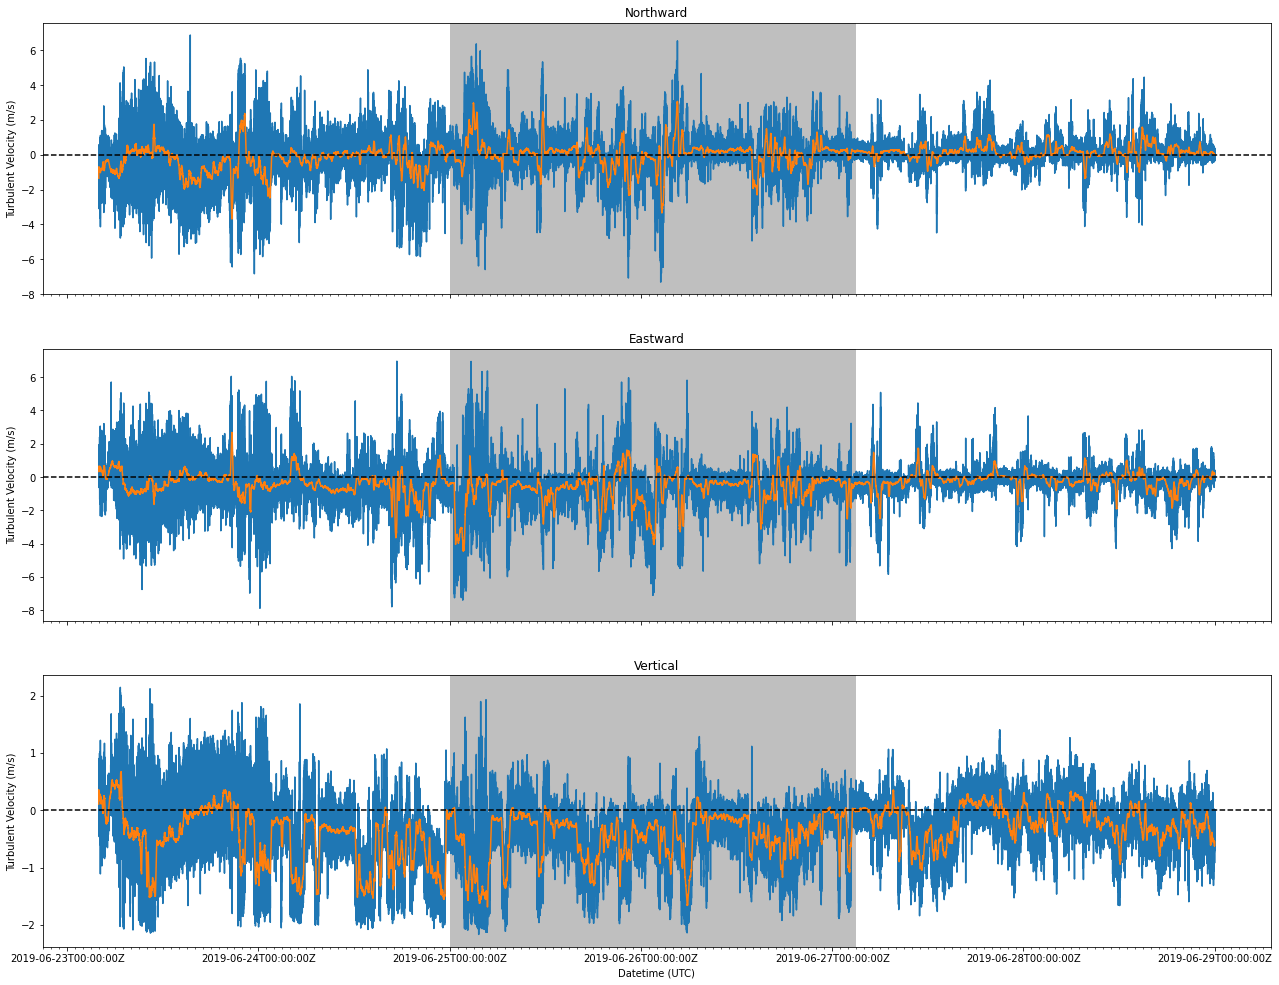

In [27]:
rolling = df.rolling('600S').mean()

fig,ax = plt.subplots(3,1,figsize=(22,17),sharex = True)
ax[0].plot(df.index,df.turbulent_velocity_north/1000)
ax[0].plot(rolling.index,rolling.turbulent_velocity_north/1000)
ax[1].plot(df.index,df.turbulent_velocity_east/1000)
ax[1].plot(rolling.index,rolling.turbulent_velocity_east/1000)
ax[2].plot(df.index,df.turbulent_velocity_vertical/1000)
ax[2].plot(rolling.index,rolling.turbulent_velocity_vertical/1000)

for i in range(3):
    ax[i].set_ylabel('Turbulent Velocity (m/s)')
    ax[i].axvspan(pbdt,pedt,facecolor = 'gray',alpha = 0.5)
    ax[i].axhline(0,color = 'black',linestyle = '--')

    ax[i].xaxis.set_major_formatter(dtfmt)
    ax[i].xaxis.set_major_locator(mdates.DayLocator())
    ax[i].xaxis.set_minor_locator(mdates.HourLocator())

ax[-1].set_xlabel('Datetime (UTC)')
ax[0].set_title('Northward')
ax[1].set_title('Eastward')
ax[2].set_title('Vertical')

## CTD Data

In [28]:
df = import_data(ctd_files)

In [29]:
df = df[(df.index >= bdt) & (df.index <= edt)]
df = df.resample('60S').mean()

Text(0.5, 1.0, 'Density')

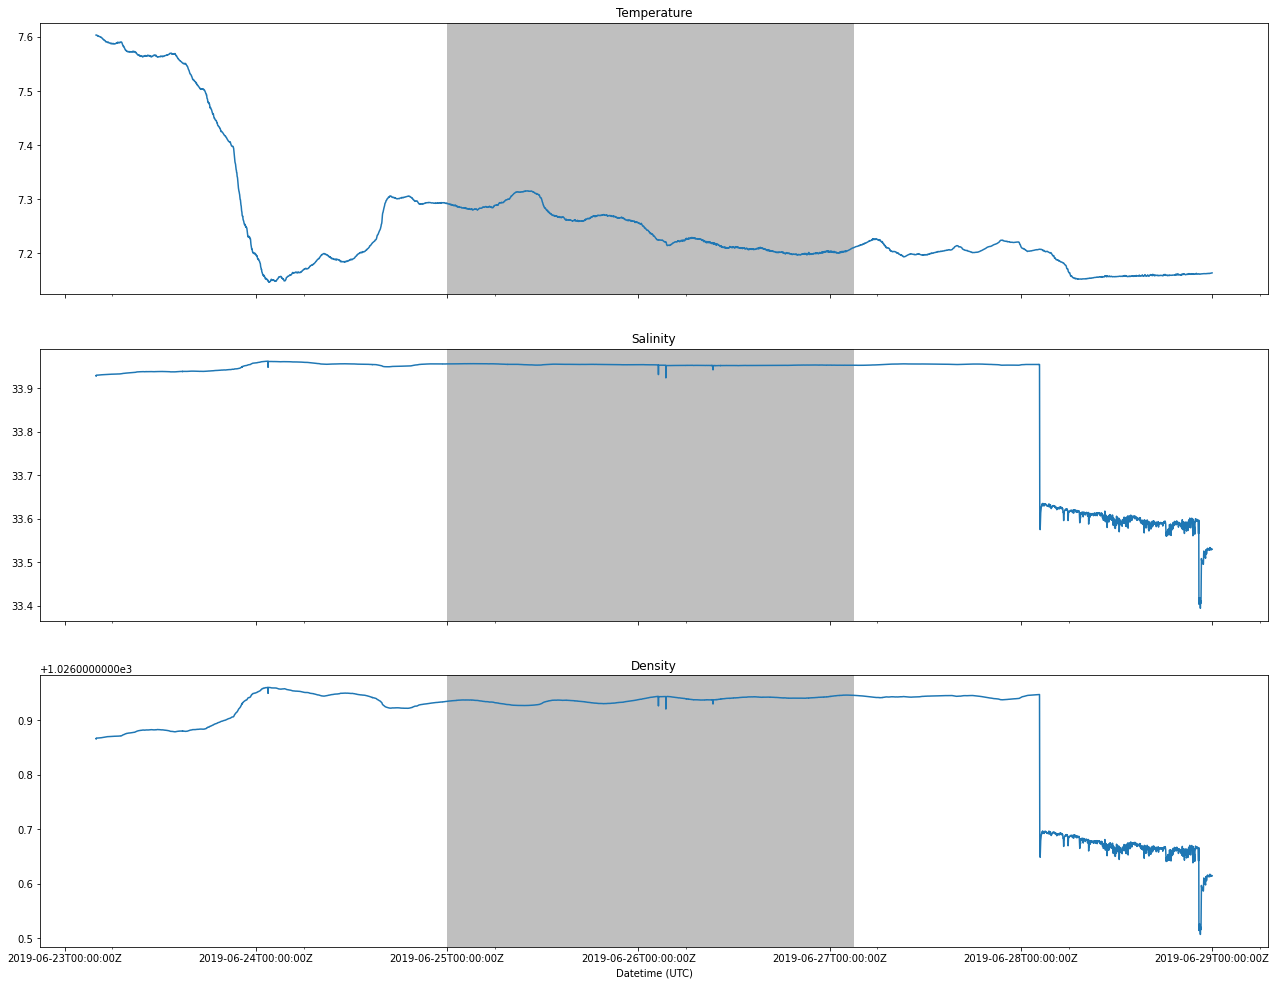

In [30]:
fig,ax = plt.subplots(3,1,figsize=(22,17),sharex = True)
ax[0].plot(df.index,df.seawater_temperature)
ax[1].plot(df.index,df.practical_salinity)
ax[2].plot(df.index,df.density)

for i in range(3):
    ax[i].axvspan(pbdt,pedt,facecolor = 'gray',alpha = 0.5)
    ax[i].xaxis.set_major_formatter(dtfmt)
    ax[i].xaxis.set_major_locator(mdates.DayLocator())
    ax[i].xaxis.set_minor_locator(mdates.HourLocator(6))

ax[-1].set_xlabel('Datetime (UTC)')
ax[0].set_title('Temperature')
ax[1].set_title('Salinity')
ax[2].set_title('Density')

# ACS Data

In [ ]:
df = import_data(acs_files)

In [ ]:
df = df[(df.index >= bdt) & (df.index <= edt)]
#df = df[(df.index >= pbdt) & (df.index <= pedt)]

C660 = df[df.wavelength_c == 661.6]
C660 = C660[['beam_attenuation']]
C660 = C660[C660['beam_attenuation'] <= 10]

A650 = df[df.wavelength_a == 649.4]
A650 = A650[['optical_absorption']]

A676 = df[df.wavelength_a == 675.7]
A676 = A676[['optical_absorption']]

A715 = df[df.wavelength_a == 714.9]
A715 = A715[['optical_absorption']]

In [ ]:
num_plots = 2
fig,ax = plt.subplots(num_plots,1 ,figsize = (11,8.5), constrained_layout=True,sharex = True)
p1 = ax[0].plot(C660.index,C660.beam_attenuation*380)  #Global Relationship Gardner et al 2006.
p2 = ax[1].scatter(A676.index,A676.optical_absorption*0.020)

# for i in range(num_plots):
#     ax[i].xaxis.set_major_formatter(dtfmt)
#     ax[i].xaxis.set_major_locator(mdates.DayLocator())
#     ax[i].xaxis.set_minor_locator(mdates.HourLocator())


ax[0].set_title('POC')
ax[1].set_title('A676 Chlorophyll-a Proxy')

ax[-1].set_xlabel('Datetime (UTC)')